In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
df1=pd.read_csv("dataset.csv",parse_dates=["date"])
df1

,PERMNO,date,TICKER,CUSIP,RET
0,10104,2011-01-31,ORCL,68389X10,0.024920
1,10104,2011-02-28,ORCL,68389X10,0.027162
2,10104,2011-03-31,ORCL,68389X10,0.016185
3,10104,2011-04-29,ORCL,68389X10,0.077395
4,10104,2011-05-31,ORCL,68389X10,-0.048387
...,...,...,...,...,...
65946,93436,2021-08-31,TSLA,88160R10,0.070605
65947,93436,2021-09-30,TSLA,88160R10,0.054042
65948,93436,2021-10-29,TSLA,88160R10,0.436530
65949,93436,2021-11-30,TSLA,88160R10,0.027612


In [3]:
df1.set_index("date",inplace=True)
df1

,PERMNO,TICKER,CUSIP,RET
date,,,,
2011-01-31,10104,ORCL,68389X10,0.024920
2011-02-28,10104,ORCL,68389X10,0.027162
2011-03-31,10104,ORCL,68389X10,0.016185
2011-04-29,10104,ORCL,68389X10,0.077395
2011-05-31,10104,ORCL,68389X10,-0.048387
...,...,...,...,...
2021-08-31,93436,TSLA,88160R10,0.070605
2021-09-30,93436,TSLA,88160R10,0.054042
2021-10-29,93436,TSLA,88160R10,0.436530


In [4]:
df1['year'] = df1.index.year
df1['quarter'] = df1.index.quarter
df1['month'] = df1.index.month
df1

,PERMNO,TICKER,CUSIP,RET,year,quarter,month
date,,,,,,,
2011-01-31,10104,ORCL,68389X10,0.024920,2011,1,1
2011-02-28,10104,ORCL,68389X10,0.027162,2011,1,2
2011-03-31,10104,ORCL,68389X10,0.016185,2011,1,3
2011-04-29,10104,ORCL,68389X10,0.077395,2011,2,4
2011-05-31,10104,ORCL,68389X10,-0.048387,2011,2,5
...,...,...,...,...,...,...,...
2021-08-31,93436,TSLA,88160R10,0.070605,2021,3,8
2021-09-30,93436,TSLA,88160R10,0.054042,2021,3,9
2021-10-29,93436,TSLA,88160R10,0.436530,2021,4,10


In [5]:
df1["RETplus"] = df1["RET"] + 1
df1

,PERMNO,TICKER,CUSIP,RET,year,quarter,month,RETplus
date,,,,,,,,
2011-01-31,10104,ORCL,68389X10,0.024920,2011,1,1,1.024920
2011-02-28,10104,ORCL,68389X10,0.027162,2011,1,2,1.027162
2011-03-31,10104,ORCL,68389X10,0.016185,2011,1,3,1.016185
2011-04-29,10104,ORCL,68389X10,0.077395,2011,2,4,1.077395
2011-05-31,10104,ORCL,68389X10,-0.048387,2011,2,5,0.951613
...,...,...,...,...,...,...,...,...
2021-08-31,93436,TSLA,88160R10,0.070605,2021,3,8,1.070605
2021-09-30,93436,TSLA,88160R10,0.054042,2021,3,9,1.054042
2021-10-29,93436,TSLA,88160R10,0.436530,2021,4,10,1.436530


In [6]:
df2 = df1[['CUSIP','RET']]
df2

,CUSIP,RET
date,,
2011-01-31,68389X10,0.024920
2011-02-28,68389X10,0.027162
2011-03-31,68389X10,0.016185
2011-04-29,68389X10,0.077395
2011-05-31,68389X10,-0.048387
...,...,...
2021-08-31,88160R10,0.070605
2021-09-30,88160R10,0.054042
2021-10-29,88160R10,0.436530


In [7]:
df3 = df2.groupby(['CUSIP']).rolling(11).mean().pivot_table(index = 'date', columns = 'CUSIP')
df3

RET                                                    \
CUSIP       00130H10  00206R10  00287Y10  00507V10  00724F10  00751Y10   
date                                                                     
2011-11-30  0.001847  0.004796       NaN  0.002773 -0.006401  0.006347   
2011-12-30 -0.001601  0.013173       NaN  0.010445 -0.010287  0.010002   
2012-01-31  0.005683  0.009160       NaN  0.011961 -0.005658  0.020945   
2012-02-29  0.006753  0.005664       NaN  0.008965  0.003572  0.026950   
2012-03-30  0.001789  0.004774       NaN  0.013556  0.006428  0.030643   
...              ...       ...       ...       ...       ...       ...   
2021-08-31  0.029992  0.003942  0.036185  0.004666  0.030203  0.028534   
2021-09-30  0.018334  0.005675  0.027827  0.005032  0.026184  0.035372   
2021-10-29  0.023110 -0.004285  0.013844  0.001470  0.031592  0.042350   
2021-11-30  0.003714 -0.013062  0.012093 -0.036599  0.030203  0.034224   
2021-12-31  0.003266 -0.007247  0.030819 -0.022486  0.023769  0.047358   

                                                    ...                      \
CUSIP       00846U10  00971T10  01741R10  02079K10  ...  G7997R10  G7S00T10   
date                                                ...                       
2011-11-30 -0.003341 -0.032264  0.002060       NaN  ...  0.032650       NaN   
2011-12-30 -0.010449 -0.024120 -0.018486       NaN  ...  0.035158       NaN   
2012-01-31  0.008631 -0.003961 -0.025705       NaN  ...  0.069875       NaN   
2012-02-29  0.005260  0.005534 -0.029861       NaN  ...  0.080763       NaN   
2012-03-30 -0.003092  0.015843 -0.040829       NaN  ...  0.061743       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2021-08-31  0.053132  0.005560  0.078970  0.065179  ...  0.059988  0.050544   
2021-09-30  0.042640  0.011290  0.067601  0.048190  ...  0.058097  0.036904   
2021-10-29  0.029541  0.004028  0.022457  0.050590  ...  0.044420  0.035068   
2021-11-30  0.024500  0.008969 -0.010150  0.047480  ...  0.052086  0.032496   
2021-12-31  0.028334  0.007240 -0.000661  0.044549  ...  0.056044  0.028994   

                                                                        \
CUSIP       G8473T10  G8994E10  H1467J10  H2906T10  H8498910  N5374510   
date                                                                     
2011-11-30 -0.014635 -0.026410  0.013510  0.019450 -0.003692  0.020957   
2011-12-30 -0.011302 -0.033566  0.015245  0.028913 -0.008403  0.016387   
2012-01-31 -0.008368 -0.016570  0.012730  0.024029  0.001781  0.040661   
2012-02-29 -0.005779 -0.009898  0.012928  0.036239  0.011466  0.037320   
2012-03-30 -0.009032 -0.010304  0.011830  0.035611  0.009274  0.027458   
...              ...       ...       ...       ...       ...       ...   
2021-08-31  0.021000  0.047947  0.046392  0.059284  0.042700  0.041568   
2021-09-30  0.016129  0.027756  0.030831  0.040968  0.035632  0.038310   
2021-10-29  0.020507  0.022878  0.029767  0.022899  0.024962  0.013805   
2021-11-30  0.016762  0.026094  0.018140  0.013797  0.024548  0.002331   
2021-12-31  0.028277  0.035006  0.030428  0.019690  0.029427  0.013504   

                                
CUSIP       N6596X10  V7780T10  
date                            
2011-11-30 -0.003806 -0.037603  
2011-12-30 -0.032928 -0.042858  
2012-01-31 -0.020200 -0.031766  
2012-02-29  0.000735 -0.021797  
2012-03-30 -0.003052 -0.015625  
...              ...       ...  
2021-08-31  0.053600  0.038140  
2021-09-30  0.038189  0.056645  
2021-10-29  0.024829  0.015949  
2021-11-30  0.034459  0.004970  
2021-12-31  0.035652  0.025983  

[122 rows x 533 columns]

In [8]:
l1 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
l1

[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [9]:
d1={}
d2={}

In [10]:
for n,yearandm in enumerate(np.unique(df3.index)):
    d1[yearandm]=[df3.loc[yearandm,:].quantile(i) for i in l1]
    d2[n]=pd.cut(df3.loc[yearandm,:],d1[yearandm],labels=[1,2,3,4,5,6,7,8,9,10],include_lowest=True) 

In [11]:
d1

{numpy.datetime64('2011-11-30T00:00:00.000000000'): [-0.17051154545454544,
  -0.023419927272727396,
  -0.010513672727272778,
  -0.003911436363636603,
  0.0011697454545453365,
  0.005816909090909084,
  0.009975909090909015,
  0.01447239999999979,
  0.01984725454545441,
  0.02933483636363618,
  0.08715390909090905],
 numpy.datetime64('2011-12-30T00:00:00.000000000'): [-0.17027472727272733,
  -0.026264009090909205,
  -0.012348581818181964,
  -0.006710509090909286,
  -0.0011783090909091537,
  0.004661227272727131,
  0.008744454545454508,
  0.01533735454545448,
  0.019542399999999883,
  0.026616254545454333,
  0.0778183636363636],
 numpy.datetime64('2012-01-31T00:00:00.000000000'): [-0.14933445454545458,
  -0.017980045454545505,
  -0.006384872727272843,
  -0.0023271090909091144,
  0.0024187999999999623,
  0.005463499999999878,
  0.009720036363636322,
  0.014002827272727225,
  0.01960496363636359,
  0.028416481818181773,
  0.10239727272727245],
 numpy.datetime64('2012-02-29T00:00:00.00000000

In [12]:
d2

{0:      CUSIP   
 RET  00130H10      5
      00206R10      5
      00287Y10    NaN
      00507V10      5
      00724F10      3
                 ... 
      H2906T10      8
      H8498910      4
      N5374510      9
      N6596X10      4
      V7780T10      1
 Name: 2011-11-30 00:00:00, Length: 533, dtype: category
 Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10],
 1:      CUSIP   
 RET  00130H10      4
      00206R10      7
      00287Y10    NaN
      00507V10      7
      00724F10      3
                 ... 
      H2906T10     10
      H8498910      3
      N5374510      8
      N6596X10      1
      V7780T10      1
 Name: 2011-12-30 00:00:00, Length: 533, dtype: category
 Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10],
 2:      CUSIP   
 RET  00130H10      6
      00206R10      6
      00287Y10    NaN
      00507V10      7
      00724F10      3
                 ... 
      H2906T10      9
      H8498910      4
      N5374510     10
      N6596X10      1
      

In [13]:
df4 = pd.DataFrame.from_dict(d2, orient='index')
df4

RET                                                                 \
    00130H10 00206R10 00287Y10 00507V10 00724F10 00751Y10 00846U10 00971T10   
0          5        5      NaN        5        3        6        4        1   
1          4        7      NaN        7        3        7        3        2   
2          6        6      NaN        7        3        9        6        3   
3          5        5      NaN        6        4        9        5        5   
4          4        5      NaN        7        5       10        3        8   
..       ...      ...      ...      ...      ...      ...      ...      ...   
117        5        1      6.0        1        5        4        8        1   
118        3        2      5.0        1        5        6        7        2   
119        5        1      3.0        2        7        9        6        2   
120        3        1      4.0        1        8        8        6        4   
121        2        1      7.0        1        5        9        6        2   

                       ...                                               \
    01741R10 02079K10  ... G7997R10 G7S00T10 G8473T10 G8994E10 H1467J10   
0          5      NaN  ...       10      NaN        2        1        7   
1          2      NaN  ...       10      NaN        3        1        7   
2          1      NaN  ...       10      NaN        2        2        7   
3          1      NaN  ...       10      NaN        2        2        7   
4          1      NaN  ...       10      NaN        2        2        7   
..       ...      ...  ...      ...      ...      ...      ...      ...   
117       10      9.0  ...        9      8.0        3        7        7   
118       10      8.0  ...        9      6.0        3        5        5   
119        5      9.0  ...        9      7.0        5        5        7   
120        1     10.0  ...       10      8.0        5        7        5   
121        1      9.0  ...       10      6.0        6        7        6   

                                                  
    H2906T10 H8498910 N5374510 N6596X10 V7780T10  
0          8        4        9        4        1  
1         10        3        8        1        1  
2          9        4       10        1        1  
3         10        7       10        3        1  
4         10        6        9        3        1  
..       ...      ...      ...      ...      ...  
117        9        7        6        8        6  
118        7        6        7        7        9  
119        5        5        3        5        4  
120        4        6        3        8        3  
121        4        6        3        7        5  

[122 rows x 533 columns]

In [14]:
df4.set_index(df3.index, inplace = True)
df4

RET                                                        \
           00130H10 00206R10 00287Y10 00507V10 00724F10 00751Y10 00846U10   
date                                                                        
2011-11-30        5        5      NaN        5        3        6        4   
2011-12-30        4        7      NaN        7        3        7        3   
2012-01-31        6        6      NaN        7        3        9        6   
2012-02-29        5        5      NaN        6        4        9        5   
2012-03-30        4        5      NaN        7        5       10        3   
...             ...      ...      ...      ...      ...      ...      ...   
2021-08-31        5        1      6.0        1        5        4        8   
2021-09-30        3        2      5.0        1        5        6        7   
2021-10-29        5        1      3.0        2        7        9        6   
2021-11-30        3        1      4.0        1        8        8        6   
2021-12-31        2        1      7.0        1        5        9        6   

                                       ...                             \
           00971T10 01741R10 02079K10  ... G7997R10 G7S00T10 G8473T10   
date                                   ...                              
2011-11-30        1        5      NaN  ...       10      NaN        2   
2011-12-30        2        2      NaN  ...       10      NaN        3   
2012-01-31        3        1      NaN  ...       10      NaN        2   
2012-02-29        5        1      NaN  ...       10      NaN        2   
2012-03-30        8        1      NaN  ...       10      NaN        2   
...             ...      ...      ...  ...      ...      ...      ...   
2021-08-31        1       10      9.0  ...        9      8.0        3   
2021-09-30        2       10      8.0  ...        9      6.0        3   
2021-10-29        2        5      9.0  ...        9      7.0        5   
2021-11-30        4        1     10.0  ...       10      8.0        5   
2021-12-31        2        1      9.0  ...       10      6.0        6   

                                                                           
           G8994E10 H1467J10 H2906T10 H8498910 N5374510 N6596X10 V7780T10  
date                                                                       
2011-11-30        1        7        8        4        9        4        1  
2011-12-30        1        7       10        3        8        1        1  
2012-01-31        2        7        9        4       10        1        1  
2012-02-29        2        7       10        7       10        3        1  
2012-03-30        2        7       10        6        9        3        1  
...             ...      ...      ...      ...      ...      ...      ...  
2021-08-31        7        7        9        7        6        8        6  
2021-09-30        5        5        7        6        7        7        9  
2021-10-29        5        7        5        5        3        5        4  
2021-11-30        7        5        4        6        3        8        3  
2021-12-31        7        6        4        6        3        7        5  

[122 rows x 533 columns]

In [15]:
df4 = df4.shift(2)
df4

RET                                                        \
           00130H10 00206R10 00287Y10 00507V10 00724F10 00751Y10 00846U10   
date                                                                        
2011-11-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2011-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2012-01-31      5.0      5.0      NaN      5.0      3.0      6.0      4.0   
2012-02-29      4.0      7.0      NaN      7.0      3.0      7.0      3.0   
2012-03-30      6.0      6.0      NaN      7.0      3.0      9.0      6.0   
...             ...      ...      ...      ...      ...      ...      ...   
2021-08-31      8.0      1.0      3.0      3.0      5.0      5.0      7.0   
2021-09-30      5.0      1.0      4.0      1.0      3.0      5.0      7.0   
2021-10-29      5.0      1.0      6.0      1.0      5.0      4.0      8.0   
2021-11-30      3.0      2.0      5.0      1.0      5.0      6.0      7.0   
2021-12-31      5.0      1.0      3.0      2.0      7.0      9.0      6.0   

                                       ...                             \
           00971T10 01741R10 02079K10  ... G7997R10 G7S00T10 G8473T10   
date                                   ...                              
2011-11-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2011-12-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2012-01-31      1.0      5.0      NaN  ...     10.0      NaN      2.0   
2012-02-29      2.0      2.0      NaN  ...     10.0      NaN      3.0   
2012-03-30      3.0      1.0      NaN  ...     10.0      NaN      2.0   
...             ...      ...      ...  ...      ...      ...      ...   
2021-08-31      2.0     10.0      8.0  ...      9.0      7.0      4.0   
2021-09-30      2.0     10.0      8.0  ...     10.0      8.0      6.0   
2021-10-29      1.0     10.0      9.0  ...      9.0      8.0      3.0   
2021-11-30      2.0     10.0      8.0  ...      9.0      6.0      3.0   
2021-12-31      2.0      5.0      9.0  ...      9.0      7.0      5.0   

                                                                           
           G8994E10 H1467J10 H2906T10 H8498910 N5374510 N6596X10 V7780T10  
date                                                                       
2011-11-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2011-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2012-01-31      1.0      7.0      8.0      4.0      9.0      4.0      1.0  
2012-02-29      1.0      7.0     10.0      3.0      8.0      1.0      1.0  
2012-03-30      2.0      7.0      9.0      4.0     10.0      1.0      1.0  
...             ...      ...      ...      ...      ...      ...      ...  
2021-08-31      8.0      4.0      6.0      7.0      8.0      8.0     10.0  
2021-09-30      9.0      6.0      7.0      7.0      8.0      8.0      4.0  
2021-10-29      7.0      7.0      9.0      7.0      6.0      8.0      6.0  
2021-11-30      5.0      5.0      7.0      6.0      7.0      7.0      9.0  
2021-12-31      5.0      7.0      5.0      5.0      3.0      5.0      4.0  

[122 rows x 533 columns]

In [16]:
df4['month'] = df4.index.month

In [17]:
df4 = df4[df4['month'].isin([1,4,7,10])]
df4

RET                                                        \
           00130H10 00206R10 00287Y10 00507V10 00724F10 00751Y10 00846U10   
date                                                                        
2012-01-31      5.0      5.0      NaN      5.0      3.0      6.0      4.0   
2012-04-30      5.0      5.0      NaN      6.0      4.0      9.0      5.0   
2012-07-31      4.0      7.0      NaN      5.0      5.0      9.0      2.0   
2012-10-31      3.0      6.0      NaN      1.0      6.0      5.0      4.0   
2013-01-31      1.0      6.0      NaN      1.0      7.0      3.0      4.0   
2013-04-30      1.0      7.0      NaN      5.0      5.0      1.0      2.0   
2013-07-31      1.0      1.0      NaN      5.0      7.0      4.0      4.0   
2013-10-31      5.0      1.0      NaN      9.0      8.0      4.0      6.0   
2014-01-31      6.0      2.0      NaN      9.0      8.0      7.0      5.0   
2014-04-30      3.0      1.0      7.0      7.0      9.0      9.0      7.0   
2014-07-31      4.0      2.0      8.0      9.0      8.0      9.0      7.0   
2014-10-31      4.0      2.0      7.0      9.0      9.0     10.0      3.0   
2015-01-30      2.0      3.0      9.0      7.0      7.0      9.0      3.0   
2015-04-30      1.0      2.0      6.0      5.0      6.0      7.0      3.0   
2015-07-31      1.0      3.0      8.0      6.0      5.0      6.0      3.0   
2015-10-30      2.0      3.0      6.0     10.0      6.0      9.0      2.0   
2016-01-29      1.0      5.0      3.0     10.0      9.0      5.0      5.0   
2016-04-29      2.0      9.0      6.0     10.0      9.0      7.0      5.0   
2016-07-29      2.0      7.0      4.0     10.0      8.0      4.0      8.0   
2016-10-31      8.0      8.0      6.0      9.0      7.0      1.0      9.0   
2017-01-31      8.0      6.0      4.0      2.0      4.0      6.0      4.0   
2017-04-28      2.0      4.0      4.0      8.0      7.0      2.0      7.0   
2017-07-31      2.0      2.0      4.0      9.0      9.0      1.0      8.0   
2017-10-31      1.0      2.0      7.0     10.0      9.0      1.0      9.0   
2018-01-31      1.0      1.0     10.0     10.0     10.0      1.0      9.0   
2018-04-30      3.0      2.0     10.0      9.0     10.0      1.0      8.0   
2018-07-31      6.0      2.0      9.0      7.0     10.0      6.0      4.0   
2018-10-31      7.0      1.0      6.0      5.0     10.0     10.0      4.0   
2019-01-31     10.0      2.0      6.0      2.0     10.0     10.0      6.0   
2019-04-30     10.0      3.0      2.0      1.0      8.0     10.0      8.0   
2019-07-31      8.0      5.0      3.0      1.0      7.0      7.0      6.0   
2019-10-31      7.0      6.0      2.0      1.0      5.0      2.0      5.0   
2020-01-31      7.0      7.0      1.0      4.0      7.0      1.0      4.0   
2020-04-30      4.0      8.0      7.0      9.0      9.0      1.0      4.0   
2020-07-31      2.0      5.0      9.0     10.0      9.0      6.0      8.0   
2020-10-30      6.0      2.0      8.0      9.0     10.0      5.0      8.0   
2021-01-29      5.0      1.0      8.0      8.0      9.0      4.0      8.0   
2021-04-30      8.0      1.0      5.0      6.0      4.0      7.0      6.0   
2021-07-30      8.0      1.0      3.0      3.0      2.0      4.0      6.0   
2021-10-29      5.0      1.0      6.0      1.0      5.0      4.0      8.0   

                                       ...                             \
           00971T10 01741R10 02079K10  ... G7S00T10 G8473T10 G8994E10   
date                                   ...                              
2012-01-31      1.0      5.0      NaN  ...      NaN      2.0      1.0   
2012-04-30      5.0      1.0      NaN  ...      NaN      2.0      2.0   
2012-07-31      5.0      1.0      NaN  ...      NaN      2.0      4.0   
2012-10-31     10.0      1.0      NaN  ...      NaN      3.0     10.0   
2013-01-31      5.0      1.0      NaN  ...      NaN      5.0     10.0   
2013-04-30      3.0      1.0      NaN  ...      NaN      8.0      8.0   
2013-07-31      9.0      1.0      NaN  ...     

In [18]:
df4.drop(df4.columns[len(df4.columns)-1], axis=1, inplace=True)

C:\Users\paul\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
ret_df = df1[['CUSIP','year','quarter','RETplus']]
ret_df

,CUSIP,year,quarter,RETplus
date,,,,
2011-01-31,68389X10,2011,1,1.024920
2011-02-28,68389X10,2011,1,1.027162
2011-03-31,68389X10,2011,1,1.016185
2011-04-29,68389X10,2011,2,1.077395
2011-05-31,68389X10,2011,2,0.951613
...,...,...,...,...
2021-08-31,88160R10,2021,3,1.070605
2021-09-30,88160R10,2021,3,1.054042
2021-10-29,88160R10,2021,4,1.436530


In [20]:
ret_df.rename(columns={"RETplus":"RET"},inplace = True)

C:\Users\paul\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [21]:
ret_df = ret_df.groupby(["CUSIP","year","quarter"]).prod().unstack(level=0)
ret_df

RET                                                    \
CUSIP         00130H10  00206R10  00287Y10  00507V10  00724F10  00751Y10   
year quarter                                                               
2011 1        1.067324  1.058144       NaN  0.895096  1.077322  0.992895   
     2        0.980001  1.040314       NaN  1.064722  0.948432  0.892259   
     3        0.766091  0.921334       NaN  1.018836  0.768522  0.994358   
     4        1.213114  1.075864       NaN  1.035294  1.169632  1.199484   
2012 1        1.103885  1.048188       NaN  1.055194  1.213654  1.272871   
     2        0.981638  1.157117       NaN  0.935258  0.943456  0.770915   
     3        0.855027  1.069474       NaN  0.940366  1.002009  1.004105   
     4        0.979121  0.905538       NaN  0.941907  1.161708  1.058007   
2013 1        1.179102  1.102479  1.111474  1.389830  1.154856  1.143193   
     2        0.956611  0.976432  1.022538  0.978723  1.046995  0.982820   
     3        1.111987  0.967556  1.091519  1.169706  1.140036  1.019342   
     4        1.094898  1.052545  1.190387  1.068946  1.152850  1.339381   
2014 1        0.987649  1.011210  0.981209  1.157599  1.097880  1.143477   
     2        1.092704  1.021261  1.106911  1.090998  1.100700  1.067036   
     3        0.915017  1.009487  1.031600  0.932287  0.956192  0.966202   
     4        0.974537  0.965763  1.140463  0.969216  1.050729  1.222871   
2015 1        0.940825  0.985894  0.901824  1.139206  1.017056  0.940168   
     2        1.039493  1.102662  1.156814  1.065345  1.095618  1.064534   
     3        0.744079  0.929639  0.815692  1.275918  1.014936  1.190220   
     4        0.986456  1.070983  1.098095  1.253156  1.142544  0.794439   
2016 1        1.247298  1.153485  0.974225  0.880910  0.998509  1.065710   
     2        1.068052  1.116781  1.093986  1.171098  1.021216  1.008419   
     3        1.038819  0.950249  1.027504  1.117840  1.133103  0.922973   
     4        0.912731  1.060943  1.003011  0.815125  0.948498  1.134522   
2017 1        0.972226  0.988313  1.051461  1.389090  1.264011  0.877011   
     2        1.004282  0.919290  1.123600  1.154633  1.086912  0.786793   
     3        1.002681  1.051210  1.236705  1.120549  1.054723  0.851360   
     4        0.993852  1.007049  1.096059  0.981553  1.174688  1.005545   
2018 1        1.061667  0.929166  0.984892  1.070751  1.233051  1.189788   
     2        1.191947  0.914473  0.988603  1.131338  1.128332  1.145170   
     3        1.054080  1.062135  1.031456  1.090015  1.107214  1.240900   
     4        1.042066  0.863762  0.986750  0.559803  0.838081  0.935781   
2019 1        1.260759  1.117451  0.885822  0.985613  1.177908  1.083386   
     2        0.934381  1.086161  0.914507  1.036679  1.105671  0.904239   
     3        0.982866  1.146129  1.057979  1.121187  0.937553  1.073439   
     4        1.227620  1.046453  1.185036  1.122827  1.193882  0.968682   
2020 1        0.688349  0.756216  0.873048  1.001009  0.964920  0.584229   
     2        1.076963  1.054749  1.307118  1.284269  1.367867  1.529147   
     3        1.261587  0.959682  0.903229  1.066535  1.126623  1.079326   
     4        1.307161  1.028183  1.240275  1.147004  1.019758  1.027753   
2021 1        1.147892  1.071619  1.022798  1.001615  0.950512  1.166529   
     2        0.977659  0.966517  1.052978  1.031526  1.231967  1.123440   
     3        0.881281  0.955896  0.968357  0.810876  0.983061  1.023155   
     4        1.071241  0.929522  1.269445  0.859671  0.984958  1.153142   

                                                      ...                      \
CUSIP         00846U10  00971T10  01741R10  02079K10  ...  G7997R10  G7S00T10   
year quarter                                          ...                       
2011 1        1.080859  0.807652  1.230518       NaN  ...  0.958416       NaN   
     2        1.141359  0.828158  0.939759       NaN  ...  1.133293       NaN   
     3        0.611427  0.631713  0.58563

In [22]:
ret_df = ret_df - 1
ret_df

RET                                                    \
CUSIP         00130H10  00206R10  00287Y10  00507V10  00724F10  00751Y10   
year quarter                                                               
2011 1        0.067324  0.058144       NaN -0.104904  0.077322 -0.007105   
     2       -0.019999  0.040314       NaN  0.064722 -0.051568 -0.107741   
     3       -0.233909 -0.078666       NaN  0.018836 -0.231478 -0.005642   
     4        0.213114  0.075864       NaN  0.035294  0.169632  0.199484   
2012 1        0.103885  0.048188       NaN  0.055194  0.213654  0.272871   
     2       -0.018362  0.157117       NaN -0.064742 -0.056544 -0.229085   
     3       -0.144973  0.069474       NaN -0.059634  0.002009  0.004105   
     4       -0.020879 -0.094462       NaN -0.058093  0.161708  0.058007   
2013 1        0.179102  0.102479  0.111474  0.389830  0.154856  0.143193   
     2       -0.043389 -0.023568  0.022538 -0.021277  0.046995 -0.017180   
     3        0.111987 -0.032444  0.091519  0.169706  0.140036  0.019342   
     4        0.094898  0.052545  0.190387  0.068946  0.152850  0.339381   
2014 1       -0.012351  0.011210 -0.018791  0.157599  0.097880  0.143477   
     2        0.092704  0.021261  0.106911  0.090998  0.100700  0.067036   
     3       -0.084983  0.009487  0.031600 -0.067713 -0.043808 -0.033798   
     4       -0.025463 -0.034237  0.140463 -0.030784  0.050729  0.222871   
2015 1       -0.059175 -0.014106 -0.098176  0.139206  0.017056 -0.059832   
     2        0.039493  0.102662  0.156814  0.065345  0.095618  0.064534   
     3       -0.255921 -0.070361 -0.184308  0.275918  0.014936  0.190220   
     4       -0.013544  0.070983  0.098095  0.253156  0.142544 -0.205561   
2016 1        0.247298  0.153485 -0.025775 -0.119090 -0.001491  0.065710   
     2        0.068052  0.116781  0.093986  0.171098  0.021216  0.008419   
     3        0.038819 -0.049751  0.027504  0.117840  0.133103 -0.077027   
     4       -0.087269  0.060943  0.003011 -0.184875 -0.051502  0.134522   
2017 1       -0.027774 -0.011687  0.051461  0.389090  0.264011 -0.122989   
     2        0.004282 -0.080710  0.123600  0.154633  0.086912 -0.213207   
     3        0.002681  0.051210  0.236705  0.120549  0.054723 -0.148640   
     4       -0.006148  0.007049  0.096059 -0.018447  0.174688  0.005545   
2018 1        0.061667 -0.070834 -0.015108  0.070751  0.233051  0.189788   
     2        0.191947 -0.085527 -0.011397  0.131338  0.128332  0.145170   
     3        0.054080  0.062135  0.031456  0.090015  0.107214  0.240900   
     4        0.042066 -0.136238 -0.013250 -0.440197 -0.161919 -0.064219   
2019 1        0.260759  0.117451 -0.114178 -0.014387  0.177908  0.083386   
     2       -0.065619  0.086161 -0.085493  0.036679  0.105671 -0.095761   
     3       -0.017134  0.146129  0.057979  0.121187 -0.062447  0.073439   
     4        0.227620  0.046453  0.185036  0.122827  0.193882 -0.031318   
2020 1       -0.311651 -0.243784 -0.126952  0.001009 -0.035080 -0.415771   
     2        0.076963  0.054749  0.307118  0.284269  0.367867  0.529147   
     3        0.261587 -0.040318 -0.096771  0.066535  0.126623  0.079326   
     4        0.307161  0.028183  0.240275  0.147004  0.019758  0.027753   
2021 1        0.147892  0.071619  0.022798  0.001615 -0.049488  0.166529   
     2       -0.022341 -0.033483  0.052978  0.031526  0.231967  0.123440   
     3       -0.118719 -0.044104 -0.031643 -0.189124 -0.016939  0.023155   
     4        0.071241 -0.070478  0.269445 -0.140329 -0.015042  0.153142   

                                                      ...                      \
CUSIP         00846U10  00971T10  01741R10  02079K10  ...  G7997R10  G7S00T10   
year quarter                                          ...                       
2011 1        0.080859 -0.192348  0.230518       NaN  ... -0.041584       NaN   
     2        0.141359 -0.171842 -0.060241       NaN  ...  0.133293       NaN   
     3       -0.388573 -0.368287 -0.41436

In [23]:
ret_df = ret_df.reset_index().iloc[4:,2:].set_index(df4.index)
ret_df

RET                                                    \
CUSIP       00130H10  00206R10  00287Y10  00507V10  00724F10  00751Y10   
date                                                                     
2012-01-31  0.103885  0.048188       NaN  0.055194  0.213654  0.272871   
2012-04-30 -0.018362  0.157117       NaN -0.064742 -0.056544 -0.229085   
2012-07-31 -0.144973  0.069474       NaN -0.059634  0.002009  0.004105   
2012-10-31 -0.020879 -0.094462       NaN -0.058093  0.161708  0.058007   
2013-01-31  0.179102  0.102479  0.111474  0.389830  0.154856  0.143193   
2013-04-30 -0.043389 -0.023568  0.022538 -0.021277  0.046995 -0.017180   
2013-07-31  0.111987 -0.032444  0.091519  0.169706  0.140036  0.019342   
2013-10-31  0.094898  0.052545  0.190387  0.068946  0.152850  0.339381   
2014-01-31 -0.012351  0.011210 -0.018791  0.157599  0.097880  0.143477   
2014-04-30  0.092704  0.021261  0.106911  0.090998  0.100700  0.067036   
2014-07-31 -0.084983  0.009487  0.031600 -0.067713 -0.043808 -0.033798   
2014-10-31 -0.025463 -0.034237  0.140463 -0.030784  0.050729  0.222871   
2015-01-30 -0.059175 -0.014106 -0.098176  0.139206  0.017056 -0.059832   
2015-04-30  0.039493  0.102662  0.156814  0.065345  0.095618  0.064534   
2015-07-31 -0.255921 -0.070361 -0.184308  0.275918  0.014936  0.190220   
2015-10-30 -0.013544  0.070983  0.098095  0.253156  0.142544 -0.205561   
2016-01-29  0.247298  0.153485 -0.025775 -0.119090 -0.001491  0.065710   
2016-04-29  0.068052  0.116781  0.093986  0.171098  0.021216  0.008419   
2016-07-29  0.038819 -0.049751  0.027504  0.117840  0.133103 -0.077027   
2016-10-31 -0.087269  0.060943  0.003011 -0.184875 -0.051502  0.134522   
2017-01-31 -0.027774 -0.011687  0.051461  0.389090  0.264011 -0.122989   
2017-04-28  0.004282 -0.080710  0.123600  0.154633  0.086912 -0.213207   
2017-07-31  0.002681  0.051210  0.236705  0.120549  0.054723 -0.148640   
2017-10-31 -0.006148  0.007049  0.096059 -0.018447  0.174688  0.005545   
2018-01-31  0.061667 -0.070834 -0.015108  0.070751  0.233051  0.189788   
2018-04-30  0.191947 -0.085527 -0.011397  0.131338  0.128332  0.145170   
2018-07-31  0.054080  0.062135  0.031456  0.090015  0.107214  0.240900   
2018-10-31  0.042066 -0.136238 -0.013250 -0.440197 -0.161919 -0.064219   
2019-01-31  0.260759  0.117451 -0.114178 -0.014387  0.177908  0.083386   
2019-04-30 -0.065619  0.086161 -0.085493  0.036679  0.105671 -0.095761   
2019-07-31 -0.017134  0.146129  0.057979  0.121187 -0.062447  0.073439   
2019-10-31  0.227620  0.046453  0.185036  0.122827  0.193882 -0.031318   
2020-01-31 -0.311651 -0.243784 -0.126952  0.001009 -0.035080 -0.415771   
2020-04-30  0.076963  0.054749  0.307118  0.284269  0.367867  0.529147   
2020-07-31  0.261587 -0.040318 -0.096771  0.066535  0.126623  0.079326   
2020-10-30  0.307161  0.028183  0.240275  0.147004  0.019758  0.027753   
2021-01-29  0.147892  0.071619  0.022798  0.001615 -0.049488  0.166529   
2021-04-30 -0.022341 -0.033483  0.052978  0.031526  0.231967  0.123440   
2021-07-30 -0.118719 -0.044104 -0.031643 -0.189124 -0.016939  0.023155   
2021-10-29  0.071241 -0.070478  0.269445 -0.140329 -0.015042  0.153142   

                                                    ...                      \
CUSIP       00846U10  00971T10  01741R10  02079K10  ...  G7997R10  G7S00T10   
date                                                ...                       
2012-01-31  0.277125  0.136927 -0.134937       NaN  ...  0.659244       NaN   
2012-04-30 -0.116154 -0.134878 -0.221067       NaN  ... -0.075088       NaN   
2012-07-31 -0.017584  0.205041  0.005958       NaN  ...  0.264436       NaN   
2012-10-31  0.067360  0.069263 -0.042634       NaN  ...  0.007515  0.163589   
2013-01-31  0.028090 -0.136641  0.050395       NaN  ...  0.201676  0.078116   
2013-04-30  0.021681  0.204699 -0.164876       NaN  ...  0.237189  0.098277   
2013-07-31  0.201357  0.215042  0.167832       NaN  ... -0.014188  0.130279   
2013-10-31  0.118478 -0.087428  0.173329    

In [24]:
df4 = df4.reset_index().iloc[:,1:]
df4

RET                                                                 \
   00130H10 00206R10 00287Y10 00507V10 00724F10 00751Y10 00846U10 00971T10   
0       5.0      5.0      NaN      5.0      3.0      6.0      4.0      1.0   
1       5.0      5.0      NaN      6.0      4.0      9.0      5.0      5.0   
2       4.0      7.0      NaN      5.0      5.0      9.0      2.0      5.0   
3       3.0      6.0      NaN      1.0      6.0      5.0      4.0     10.0   
4       1.0      6.0      NaN      1.0      7.0      3.0      4.0      5.0   
5       1.0      7.0      NaN      5.0      5.0      1.0      2.0      3.0   
6       1.0      1.0      NaN      5.0      7.0      4.0      4.0      9.0   
7       5.0      1.0      NaN      9.0      8.0      4.0      6.0      6.0   
8       6.0      2.0      NaN      9.0      8.0      7.0      5.0      3.0   
9       3.0      1.0      7.0      7.0      9.0      9.0      7.0     10.0   
10      4.0      2.0      8.0      9.0      8.0      9.0      7.0      7.0   
11      4.0      2.0      7.0      9.0      9.0     10.0      3.0      6.0   
12      2.0      3.0      9.0      7.0      7.0      9.0      3.0      9.0   
13      1.0      2.0      6.0      5.0      6.0      7.0      3.0      6.0   
14      1.0      3.0      8.0      6.0      5.0      6.0      3.0      8.0   
15      2.0      3.0      6.0     10.0      6.0      9.0      2.0      8.0   
16      1.0      5.0      3.0     10.0      9.0      5.0      5.0      3.0   
17      2.0      9.0      6.0     10.0      9.0      7.0      5.0      2.0   
18      2.0      7.0      4.0     10.0      8.0      4.0      8.0      1.0   
19      8.0      8.0      6.0      9.0      7.0      1.0      9.0      1.0   
20      8.0      6.0      4.0      2.0      4.0      6.0      4.0      9.0   
21      2.0      4.0      4.0      8.0      7.0      2.0      7.0      5.0   
22      2.0      2.0      4.0      9.0      9.0      1.0      8.0      1.0   
23      1.0      2.0      7.0     10.0      9.0      1.0      9.0      2.0   
24      1.0      1.0     10.0     10.0     10.0      1.0      9.0      1.0   
25      3.0      2.0     10.0      9.0     10.0      1.0      8.0      5.0   
26      6.0      2.0      9.0      7.0     10.0      6.0      4.0      9.0   
27      7.0      1.0      6.0      5.0     10.0     10.0      4.0      9.0   
28     10.0      2.0      6.0      2.0     10.0     10.0      6.0      5.0   
29     10.0      3.0      2.0      1.0      8.0     10.0      8.0      3.0   
30      8.0      5.0      3.0      1.0      7.0      7.0      6.0      5.0   
31      7.0      6.0      2.0      1.0      5.0      2.0      5.0      8.0   
32      7.0      7.0      1.0      4.0      7.0      1.0      4.0      8.0   
33      4.0      8.0      7.0      9.0      9.0      1.0      4.0      8.0   
34      2.0      5.0      9.0     10.0      9.0      6.0      8.0      9.0   
35      6.0      2.0      8.0      9.0     10.0      5.0      8.0      7.0   
36      5.0      1.0      8.0      8.0      9.0      4.0      8.0      7.0   
37      8.0      1.0      5.0      6.0      4.0      7.0      6.0      1.0   
38      8.0      1.0      3.0      3.0      2.0      4.0      6.0      1.0   
39      5.0      1.0      6.0      1.0      5.0      4.0      8.0      1.0   

                      ...                                               \
   01741R10 02079K10  ... G7997R10 G7S00T10 G8473T10 G8994E10 H1467J10   
0       5.0      NaN  ...     10.0      NaN      2.0      1.0      7.0   
1       1.0      NaN  ...     10.0      NaN      2.0      2.0      7.0   
2       1.0      NaN  ...     10.0      NaN      2.0      4.0      7.0   
3       1.0      NaN  ...     10.0      NaN      3.0     10.0      4.0   
4       1.0      NaN  ...     10.0      NaN      5.0     10.0      5.0   
5       1.0      NaN  ...      9.0      NaN      8.0      8.0      7.0   
6       1.0      NaN  ...     10.0      NaN      8.0      7.0      5.0   
7       1.0      NaN  ...      8.0      NaN      5.0      7.0    

In [25]:
ret_by_buc = df4.iloc[0:10:,0:1].reset_index().iloc[:,1:]
ret_by_buc

,RET
,00130H10
0,5.0
1,5.0
2,4.0
3,3.0
4,1.0
5,1.0
6,1.0
7,5.0
8,6.0


In [26]:
for i in range(len(df4)):
    df5 = pd.concat([df4.iloc[i,:],ret_df.iloc[i,:]],axis = 1).groupby(i).mean()
    ret_by_buc  = pd.concat([ret_by_buc,df5], axis = 1)
    del df5

In [27]:
ret_by_buc

,"(RET, 00130H10)",2012-01-31 00:00:00,2012-04-30 00:00:00,2012-07-31 00:00:00,2012-10-31 00:00:00,2013-01-31 00:00:00,2013-04-30 00:00:00,2013-07-31 00:00:00,2013-10-31 00:00:00,2014-01-31 00:00:00,...,2019-07-31 00:00:00,2019-10-31 00:00:00,2020-01-31 00:00:00,2020-04-30 00:00:00,2020-07-31 00:00:00,2020-10-30 00:00:00,2021-01-29 00:00:00,2021-04-30 00:00:00,2021-07-30 00:00:00,2021-10-29 00:00:00
0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,5.0,0.271917,-0.106425,0.103172,0.026157,0.155418,0.046935,0.063295,0.060744,0.058273,...,0.018408,0.131952,-0.338656,0.319620,0.022555,0.362736,0.224989,0.033130,-0.005276,0.091311
2.0,4.0,0.172467,-0.034847,0.051176,0.006803,0.097704,0.091353,0.061541,0.074205,0.057789,...,0.002096,0.130752,-0.255471,0.270147,0.058730,0.300019,0.166901,0.063926,-0.015262,0.094980
3.0,3.0,0.179265,-0.049423,0.057496,0.020877,0.130946,0.024123,0.059485,0.091952,0.028430,...,0.009142,0.104620,-0.268383,0.220932,0.060723,0.210108,0.132567,0.068889,0.008741,0.121833
4.0,1.0,0.180564,-0.033231,0.049658,0.035434,0.133544,0.058902,0.051425,0.101361,0.024614,...,0.023324,0.111005,-0.207582,0.201716,0.107948,0.185206,0.103434,0.074208,-0.010281,0.103467
5.0,1.0,0.095616,-0.028840,0.073489,0.032763,0.150799,0.038600,0.080336,0.089197,0.032049,...,0.027792,0.069156,-0.243514,0.208085,0.088884,0.144568,0.114227,0.061055,0.016308,0.116599
6.0,1.0,0.134660,-0.003473,0.059602,0.034998,0.134832,0.033327,0.068723,0.118339,0.024084,...,0.049094,0.068609,-0.250841,0.209988,0.052723,0.141166,0.088759,0.100793,0.006542,0.065323
7.0,5.0,0.081457,-0.000503,0.032047,0.040562,0.138223,0.001532,0.081430,0.136335,0.026847,...,0.022204,0.024837,-0.253951,0.219475,0.093254,0.109518,0.073086,0.065009,-0.025457,0.101546
8.0,6.0,0.092286,0.004490,0.037123,0.036596,0.131882,0.024045,0.093320,0.121836,0.038081,...,0.040129,0.072382,-0.233876,0.217632,0.109466,0.160129,0.077989,0.090658,-0.012778,0.072428
9.0,3.0,0.124256,-0.008388,0.051226,0.046503,0.114016,0.037102,0.114026,0.134203,0.030669,...,0.021356,0.035104,-0.217292,0.221503,0.058982,0.124068,0.112747,0.046670,-0.007068,0.095643


In [28]:
ret_by_buc = ret_by_buc.iloc[1:,1:]
ret_by_buc

,2012-01-31,2012-04-30,2012-07-31,2012-10-31,2013-01-31,2013-04-30,2013-07-31,2013-10-31,2014-01-31,2014-04-30,...,2019-07-31,2019-10-31,2020-01-31,2020-04-30,2020-07-31,2020-10-30,2021-01-29,2021-04-30,2021-07-30,2021-10-29
1.0,0.271917,-0.106425,0.103172,0.026157,0.155418,0.046935,0.063295,0.060744,0.058273,0.061966,...,0.018408,0.131952,-0.338656,0.319620,0.022555,0.362736,0.224989,0.033130,-0.005276,0.091311
2.0,0.172467,-0.034847,0.051176,0.006803,0.097704,0.091353,0.061541,0.074205,0.057789,0.052544,...,0.002096,0.130752,-0.255471,0.270147,0.058730,0.300019,0.166901,0.063926,-0.015262,0.094980
3.0,0.179265,-0.049423,0.057496,0.020877,0.130946,0.024123,0.059485,0.091952,0.028430,0.060101,...,0.009142,0.104620,-0.268383,0.220932,0.060723,0.210108,0.132567,0.068889,0.008741,0.121833
4.0,0.180564,-0.033231,0.049658,0.035434,0.133544,0.058902,0.051425,0.101361,0.024614,0.061729,...,0.023324,0.111005,-0.207582,0.201716,0.107948,0.185206,0.103434,0.074208,-0.010281,0.103467
5.0,0.095616,-0.028840,0.073489,0.032763,0.150799,0.038600,0.080336,0.089197,0.032049,0.035483,...,0.027792,0.069156,-0.243514,0.208085,0.088884,0.144568,0.114227,0.061055,0.016308,0.116599
6.0,0.134660,-0.003473,0.059602,0.034998,0.134832,0.033327,0.068723,0.118339,0.024084,0.051588,...,0.049094,0.068609,-0.250841,0.209988,0.052723,0.141166,0.088759,0.100793,0.006542,0.065323
7.0,0.081457,-0.000503,0.032047,0.040562,0.138223,0.001532,0.081430,0.136335,0.026847,0.019673,...,0.022204,0.024837,-0.253951,0.219475,0.093254,0.109518,0.073086,0.065009,-0.025457,0.101546
8.0,0.092286,0.004490,0.037123,0.036596,0.131882,0.024045,0.093320,0.121836,0.038081,0.062940,...,0.040129,0.072382,-0.233876,0.217632,0.109466,0.160129,0.077989,0.090658,-0.012778,0.072428
9.0,0.124256,-0.008388,0.051226,0.046503,0.114016,0.037102,0.114026,0.134203,0.030669,0.052191,...,0.021356,0.035104,-0.217292,0.221503,0.058982,0.124068,0.112747,0.046670,-0.007068,0.095643
10.0,0.210402,-0.036402,0.079297,0.042010,0.157859,0.012082,0.151645,0.120408,0.058766,0.066779,...,0.002512,0.072605,-0.204170,0.381853,0.186205,0.221263,0.064704,0.118549,0.029455,0.071681


In [29]:
l2 = list(range(1,11))
l2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [30]:
mean_ret = ret_by_buc.mean(1).to_frame()
mean_ret.index = list(l2)
mean_ret

,0
1,0.056155
2,0.055663
3,0.050388
4,0.052883
5,0.048363
6,0.047388
7,0.041446
8,0.044682
9,0.046091
10,0.067300


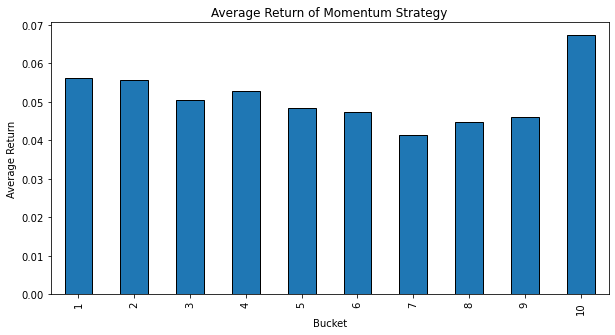

In [31]:
mean_ret.plot(kind="bar",figsize = (10,5), edgecolor='black',legend = False)
plt.xlabel('Bucket')
plt.ylabel('Average Return')
plt.title('Average Return of Momentum Strategy');

In [32]:
stats.f_oneway(ret_by_buc.iloc[0,:],ret_by_buc.iloc[1,:],ret_by_buc.iloc[2,:],ret_by_buc.iloc[3,:],ret_by_buc.iloc[4,:],
               ret_by_buc.iloc[5,:],ret_by_buc.iloc[6,:],ret_by_buc.iloc[7,:],ret_by_buc.iloc[8,:],ret_by_buc.iloc[9,:])

F_onewayResult(statistic=0.2904149328301101, pvalue=0.9772308458203334)

In [33]:
stats.f_oneway(ret_by_buc.iloc[6,:],ret_by_buc.iloc[9,:])

F_onewayResult(statistic=1.6966997957602246, pvalue=0.19655297505085076)